In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree


In [2]:
data = pd.read_csv("bank-full.csv", delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Checking for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [4]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [5]:
# Define the feature variables (X) and the target variable (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [6]:
# Evaluating the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[11103   863]
 [  849   749]]


In [7]:
# Evaluating the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.47      0.47      1598

    accuracy                           0.87     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



In [8]:
# Evaluating the model
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.8737835446770864


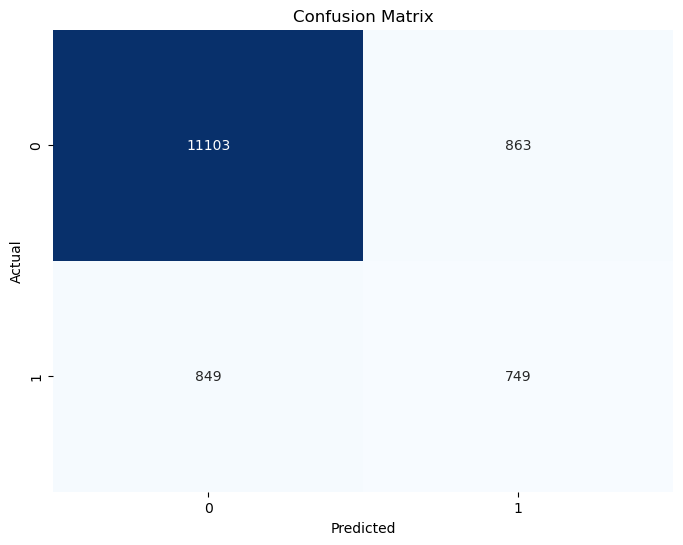

In [9]:
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

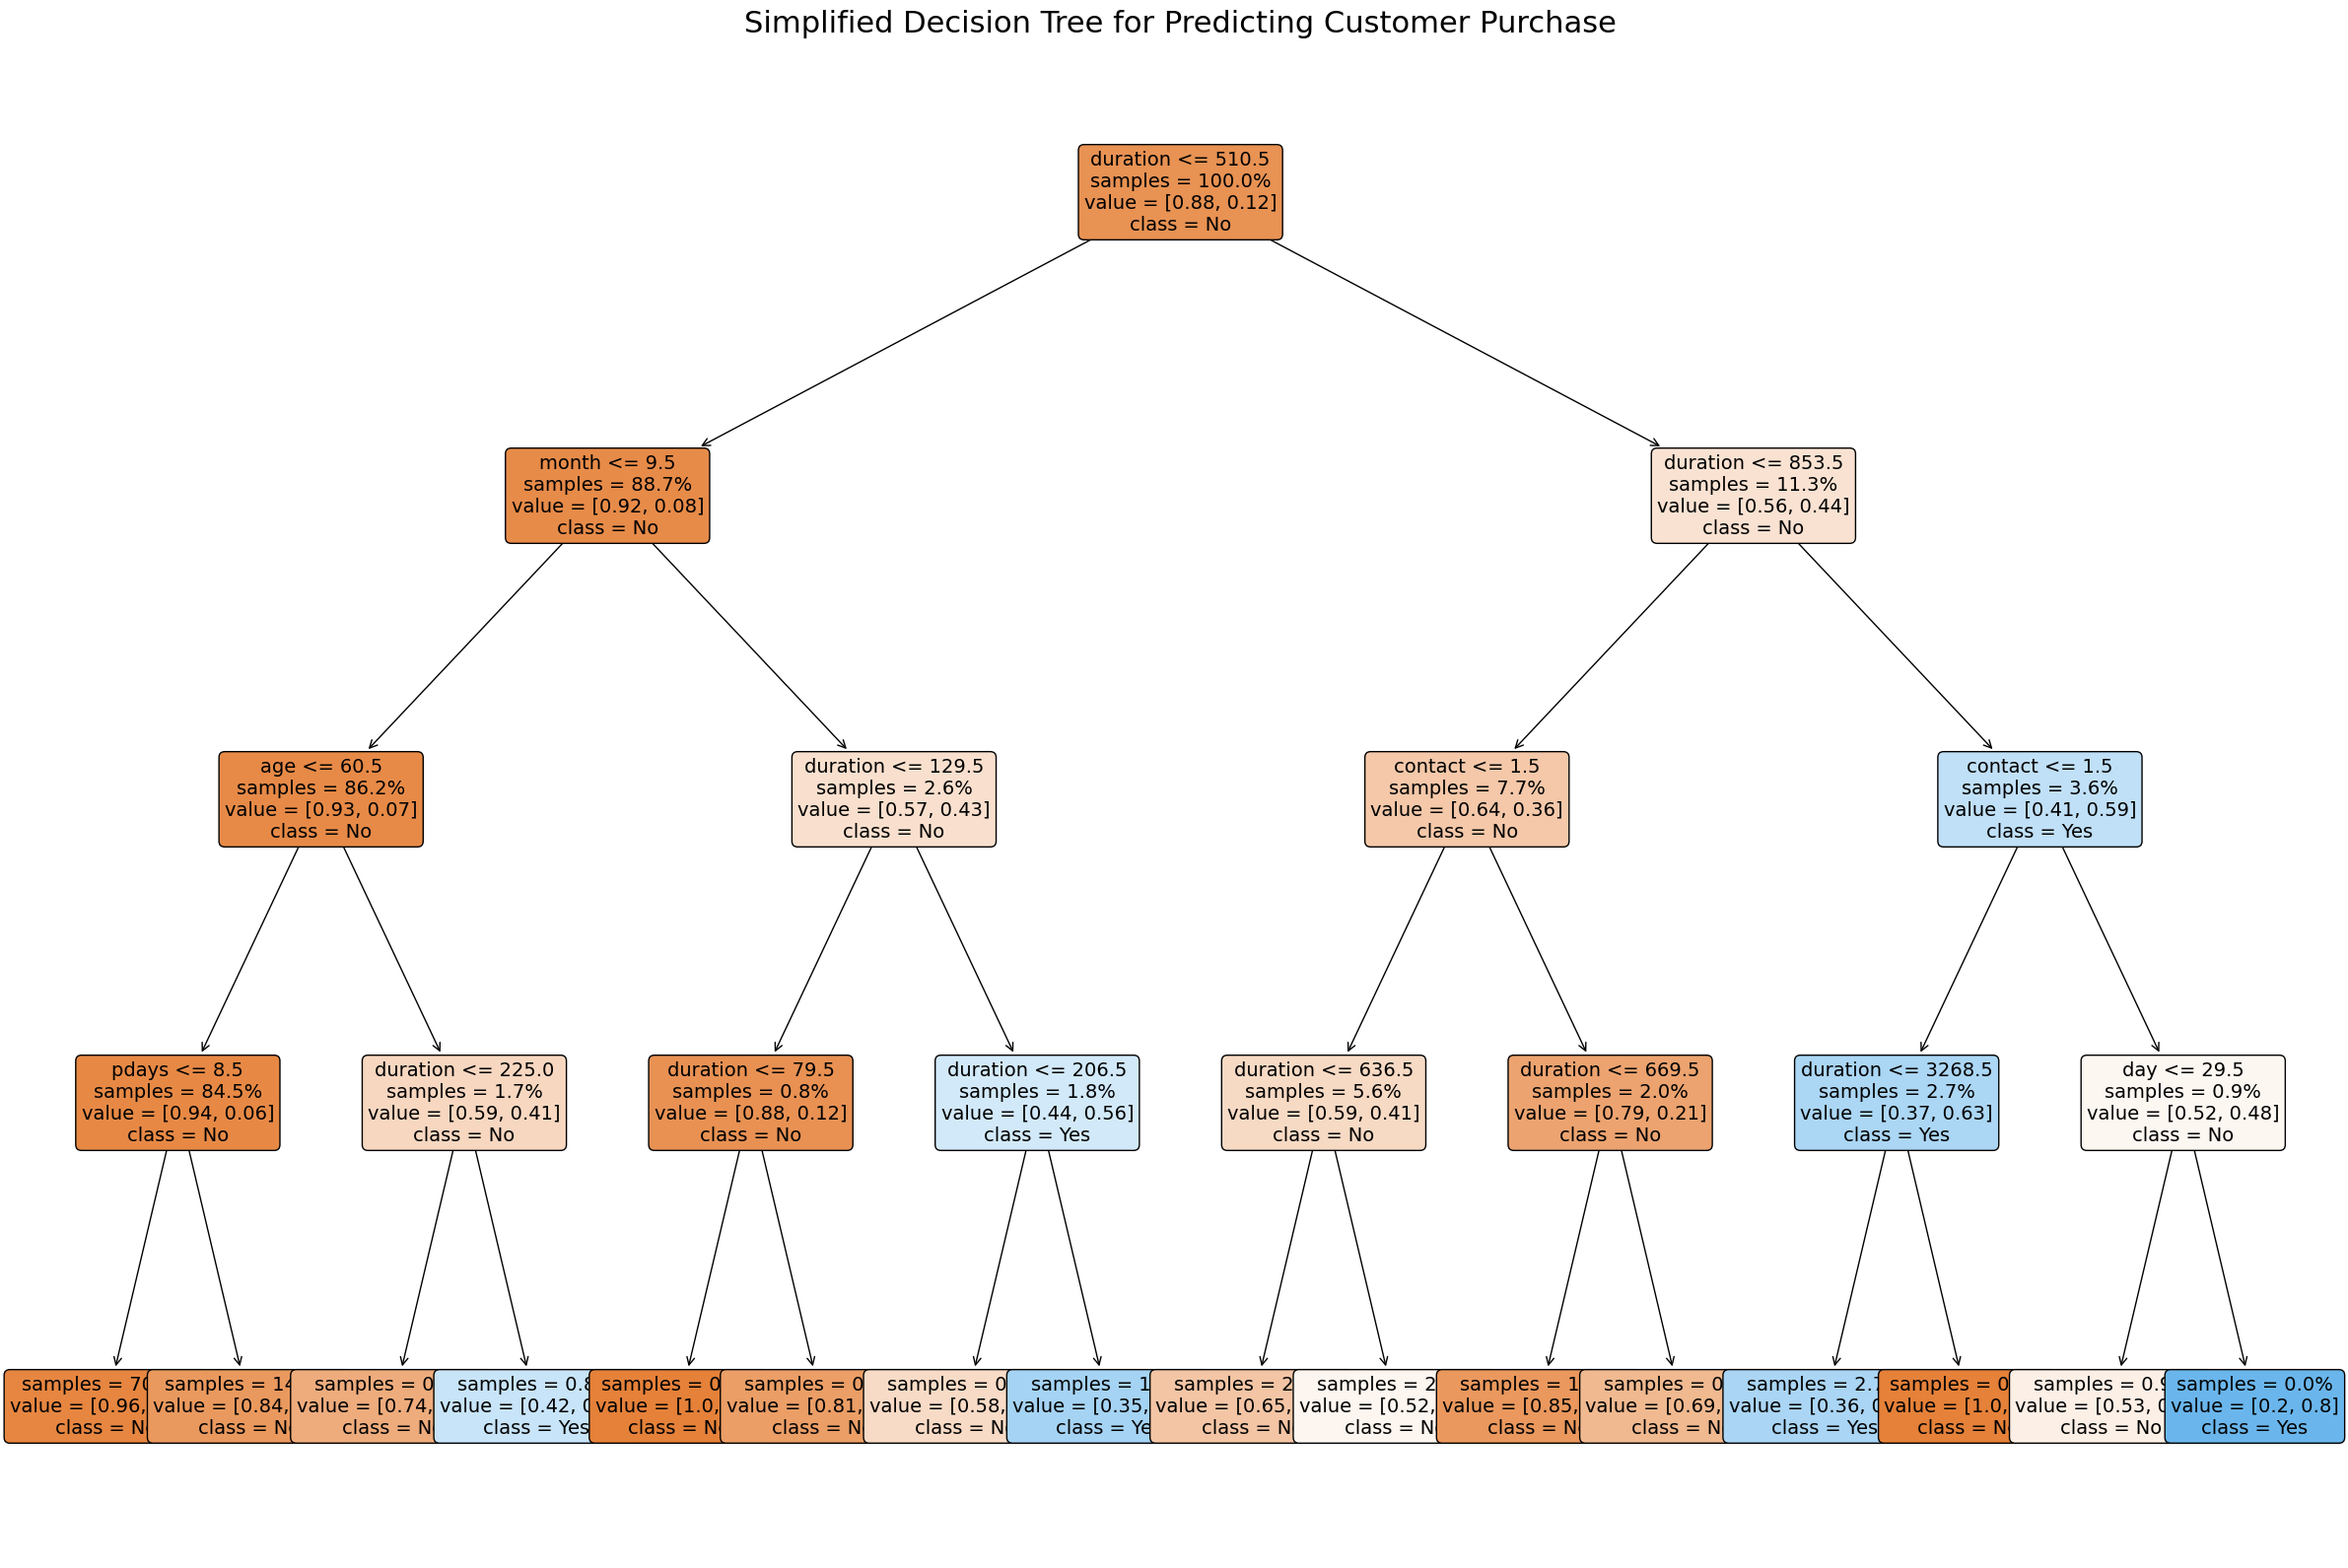

In [15]:
clf = DecisionTreeClassifier(random_state=42, max_depth=4)  # Limit the depth of the tree
clf.fit(X_train, y_train)
plt.figure(figsize=(30,20))
feature_names = X.columns.tolist()
tree.plot_tree(clf, 
               filled=True, 
               feature_names=feature_names, 
               class_names=['No', 'Yes'], 
               rounded=True, 
               proportion=True,   # Proportionately size the nodes
               precision=2,        # Limit decimal places to 2 for readability
               fontsize=14,        # Increased font size for better readability
               impurity=False)     # Remove impurity measures from the plot
plt.title("Simplified Decision Tree for Predicting Customer Purchase", fontsize=22)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Decision Nodes", fontsize=18)
plt.show()